# 연도별 개인 총소득 분포

In [120]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
from ipywidgets import widgets
from pathlib import Path

sns.set_theme(style="whitegrid")

data_dir = Path('/Users/suzinyou/Dropbox/가천대 서울연구원 프로젝트/10. 데이터산출물')
gdrive = Path('/Users/suzinyou/Google Drive/가천대 불평등과 사회정책 연구소/Data')

# inc_tot_centiles = pd.read_csv(gdrive / '03_quantiles'/ 'bfc_seoul_indi_centile_inc_tot.csv')
centiles = pd.read_csv(data_dir / '03_quantiles' / 'seoul_indi_centile.csv')

# centiles.loc[:, 'var'] = centiles['var'].apply(lambda x: 'prop_txbs_hs' if x == 'prop_txb' else x)

# inc_tot_centiles['var'] = 'inc_tot'
# inc_tot_centiles.loc[:, 'rank_mean'] = inc_tot_centiles['rank_sum'] / inc_tot_centiles['freq']

# centiles = centiles.append(inc_tot_centiles)

In [29]:
#centiles.to_csv(data_dir / '03_quantiles' / 'seoul_indi_centile.csv')

In [121]:
centiles.head()

,std_yyyy,var,rank,freq,rank_min,rank_max,rank_mean,rank_sum
0,2003,inc_tot,NaN,7206869,NaN,NaN,NaN,NaN
1,2003,inc_tot,0.0,38962,1.0,200000.0,100203.33543,3.904122e+09
2,2003,inc_tot,1.0,38229,200200.0,400000.0,304614.29959,1.164510e+10
3,2003,inc_tot,2.0,38426,400064.0,580000.0,497901.36434,1.913236e+10
4,2003,inc_tot,3.0,38967,580001.0,730000.0,657248.32009,2.561100e+10


In [124]:
year = widgets.IntSlider(
    value=2018,
    min=2003,
    max=2018,
    step=1.0,
    description='연도',
    continuous_update=False
)

variable = widgets.Dropdown(
    options=list(centiles['var'].unique()),
    value='inc_tot',
    description='변수',
)

fix_y_range = widgets.Checkbox(
    description='y축 범위 고정?',
    value=True,
)
# Assign an empty figure widget with two traces
trace1 = go.Scatter(x=centiles['rank'], y=centiles['rank_mean'], fill='tonexty')
g = go.FigureWidget(data=[trace1],
                    layout=go.Layout(
                        title=dict(
                            text='100분위 분위별 평균'
                        ), height=540, width=620
                    ))

In [125]:
def response(change):
    filter_list = (centiles['std_yyyy'] == year.value) & (centiles['var'] == variable.value)
    temp_df = centiles[filter_list]

    x1 = temp_df['rank']
    with g.batch_update():
        g.data[0].x = x1
        g.data[0].y = temp_df['rank_mean']
        g.layout.xaxis.title = '분위'
        g.layout.yaxis.title = f'평균 {var2ko[variable.value]}'
        g.layout.title.text = f'100분위 분위별 평균 {var2ko[variable.value]} ({year.value}년)'
        if fix_y_range.value:
            if variable.value == 'inc_tot':
                g.layout.yaxis.range = [0., 500*1e6]
            elif variable.value == 'inc_wage':
                g.layout.yaxis.range = [0., 400*1e6]
            else:
                g.layout.yaxis.range = [0., 1.4*1e9]
        else:
            g.layout.yaxis.autorange = True

year.observe(response, names="value")
fix_y_range.observe(response, names="value")
variable.observe(response, names="value")

In [126]:
container = widgets.HBox(children=[variable, fix_y_range, year])

widgets.VBox([container, g])

In [139]:
centiles

,std_yyyy,var,rank,freq,rank_min,rank_max,rank_mean,rank_sum
0,2003,inc_tot,NaN,7206869,NaN,NaN,NaN,NaN
1,2003,inc_tot,0.0,38962,1.000000e+00,2.000000e+05,1.002033e+05,3.904122e+09
2,2003,inc_tot,1.0,38229,2.002000e+05,4.000000e+05,3.046143e+05,1.164510e+10
3,2003,inc_tot,2.0,38426,4.000640e+05,5.800000e+05,4.979014e+05,1.913236e+10
4,2003,inc_tot,3.0,38967,5.800010e+05,7.300000e+05,6.572483e+05,2.561100e+10
...,...,...,...,...,...,...,...,...
4643,2018,prop_txbs_hs,95.0,25599,5.664000e+08,6.192000e+08,5.926223e+08,1.517054e+13
4644,2018,prop_txbs_hs,96.0,25885,6.192000e+08,6.912000e+08,6.553929e+08,1.696484e+13
4645,2018,prop_txbs_hs,97.0,26307,6.912175e+08,7.997073e+08,7.407315e+08,1.948642e+13
4646,2018,prop_txbs_hs,98.0,26423,7.997144e+08,1.027200e+09,8.964992e+08,2.368820e+13


In [128]:
top10p_sum = centiles[centiles['rank']>= 90].groupby(['std_yyyy', 'var']).sum()
centile_sum = centiles[centiles['rank'].notnull()].groupby(['std_yyyy', 'var']).sum()
top10p_share = (top10p_sum.rank_sum / centile_sum.rank_sum).reset_index().rename(columns={'rank_sum':'share'})

In [129]:
top10p_share = (top10p_sum.rank_sum / centile_sum.rank_sum).reset_index().rename(columns={'rank_sum':'share'})

<AxesSubplot:xlabel='std_yyyy', ylabel='share'>

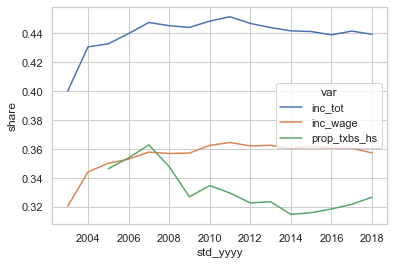

In [133]:
sns.lineplot(data=top10p_share, x='std_yyyy', y='share', hue='var')

In [136]:
top1p_sum = centiles[centiles['rank']>= 99].groupby(['std_yyyy', 'var']).sum()
top1p_share = (top1p_sum.rank_sum / centile_sum.rank_sum).reset_index().rename(columns={'rank_sum':'share'})

<AxesSubplot:xlabel='std_yyyy', ylabel='share'>

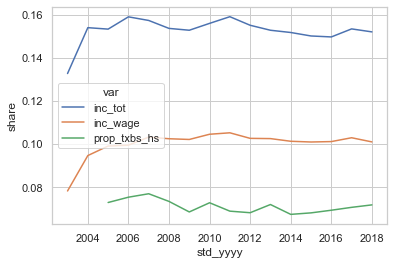

In [137]:
sns.lineplot(data=top1p_share, x='std_yyyy', y='share', hue='var')

<AxesSubplot:xlabel='std_yyyy', ylabel='share'>

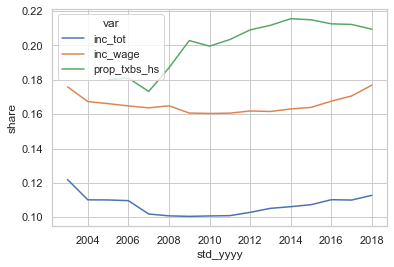

In [138]:
bottom50_sum = centiles[centiles['rank']< 50].groupby(['std_yyyy', 'var']).sum()
bottom50_share = (bottom50_sum.rank_sum / centile_sum.rank_sum).reset_index().rename(columns={'rank_sum':'share'})

sns.lineplot(data=bottom50_share, x='std_yyyy', y='share', hue='var')

<AxesSubplot:xlabel='std_yyyy', ylabel='share'>

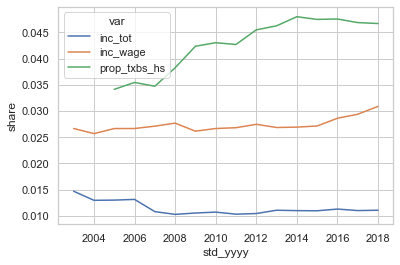

In [140]:
bottom20_sum = centiles[centiles['rank']< 20].groupby(['std_yyyy', 'var']).sum()
bottom20_share = (bottom20_sum.rank_sum / centile_sum.rank_sum).reset_index().rename(columns={'rank_sum':'share'})

sns.lineplot(data=bottom20_share, x='std_yyyy', y='share', hue='var')

<AxesSubplot:xlabel='std_yyyy', ylabel='share'>

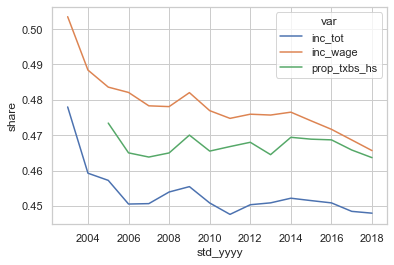

In [141]:
middle40_sum = centiles[(centiles['rank']>= 50) & (centiles['rank']< 90)].groupby(['std_yyyy', 'var']).sum()
middle40_share = (middle40_sum.rank_sum / centile_sum.rank_sum).reset_index().rename(columns={'rank_sum':'share'})
sns.lineplot(data=middle40_share, x='std_yyyy', y='share', hue='var')

## 상위 1% 1000분위 분위별 평균

In [143]:
toppct = pd.read_csv(data_dir / '03_quantiles' / 'seoul_indi_top1p_1000tile.csv')

In [148]:
year1p = widgets.IntSlider(
    value=2018,
    min=2003,
    max=2018,
    step=1.0,
    description='연도',
    continuous_update=False
)

variable1p = widgets.Dropdown(
    options=list(toppct['var'].unique()),
    value='inc_tot',
    description='변수',
)

fix_y_range1p = widgets.Checkbox(
    description='y축 범위 고정?',
    value=True,
)
# Assign an empty figure widget with two traces
trace2 = go.Scatter(x=toppct['rank'], y=toppct['rank_mean'], fill='tozeroy')
g = go.FigureWidget(data=[trace2],
                    layout=go.Layout(
                        title=dict(
                            text='상위 1% 1000분위 분위별 평균'
                        ),height=540, width=620
                    ))

In [149]:
def response(change):
    filter_list = (toppct['std_yyyy'] == year1p.value) & (toppct['var'] == variable1p.value)
    temp_df = toppct[filter_list]

    x1 = temp_df['rank']
    with g.batch_update():
        g.data[0].x = x1
        g.data[0].y = temp_df['rank_mean']
        g.layout.xaxis.title = '분위'
        g.layout.yaxis.title = f'평균 {var2ko[variable1p.value]}'
        g.layout.title.text = f'상위 1% 1000분위 분위별 평균 {var2ko[variable1p.value]} ({year1p.value}년)'
        if fix_y_range1p.value:
            if variable1p.value == 'inc_tot':
                g.layout.yaxis.range = [0., 5000*1e6]
            elif variable1p.value == 'inc_wage':
                g.layout.yaxis.range = [0.,12*1e9]
            else:
                g.layout.yaxis.range = [0., 20*1e9]
        else:
            g.layout.yaxis.autorange = True

year1p.observe(response, names="value")
fix_y_range1p.observe(response, names="value")
variable1p.observe(response, names="value")

In [150]:
container = widgets.HBox(children=[variable1p, fix_y_range1p, year1p])

widgets.VBox([container, g])

In [117]:
import chart_studio
chart_studio.tools.set_credentials_file(username='snoozy', api_key='BwnmdIMM7AVzmjQV4LYr')

In [118]:
chart_studio.tools.set_config_file(world_readable=False,
                             sharing='secret')

In [116]:
from ipywidgets.embed import embed_minimal_html
embed_minimal_html('../reports/figures/exporttest.html', views=[container, g], title='Widgets export')

In [161]:
top01p_sum = toppct[toppct['rank']>= 900].groupby(['std_yyyy', 'var']).sum()
top01p_share = (top01p_sum.rank_sum / centile_sum.rank_sum).reset_index().rename(columns={'rank_sum':'share'})

<AxesSubplot:xlabel='std_yyyy', ylabel='share'>

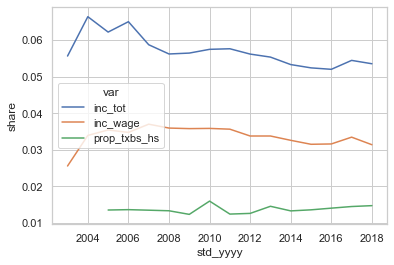

In [162]:
sns.lineplot(data=top01p_share, x='std_yyyy', y='share', hue='var')

<AxesSubplot:xlabel='std_yyyy', ylabel='share'>

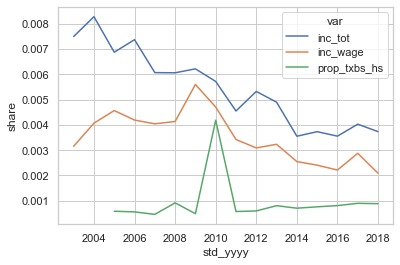

In [166]:
top0001p_sum = toppct[toppct['rank']>= 999].groupby(['std_yyyy', 'var']).sum()
top0001p_share = (top0001p_sum.rank_sum / centile_sum.rank_sum).reset_index().rename(columns={'rank_sum':'share'})
sns.lineplot(data=top0001p_share, x='std_yyyy', y='share', hue='var')

In [165]:
toppct['rank'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [167]:
gaibja = pd.read_csv(data_dir / '05_household' / 'seoul_hh_gaibjatype.csv')

<AxesSubplot:xlabel='STD_YYYY', ylabel='MEDIAN'>

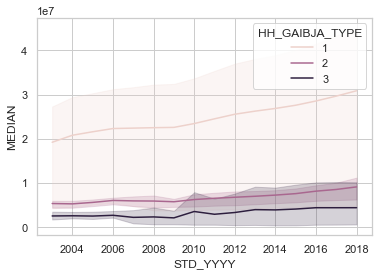

In [172]:
sns.lineplot(data=gaibja, x='std_yyyy'.upper(), y='MEDIAN', hue='HH_GAIBJA_TYPE')

In [171]:
gaibja.head()

,STD_YYYY,HH_GAIBJA_TYPE,COUNT,VAR,MEAN,MEDIAN
0,2002,1,2249698,inc_tot,NaN,NaN
1,2003,1,2156432,inc_tot,3.712406e+07,27306490.0
2,2004,1,2035889,inc_tot,4.216389e+07,29433200.0
3,2005,1,2133308,inc_tot,4.380081e+07,30312980.0
4,2006,1,2274651,inc_tot,4.586276e+07,31222900.0
